In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

from PIL import Image
import urllib
from tqdm.auto import tqdm

### Read Product Data from CSV

In [2]:
filename = "data/budni_food_data.csv"

products_df = pd.read_csv(filename)

for col in ['category', 'images']:
    products_df[col] = products_df[col].apply(literal_eval)

products_df

,id,ean,brand,name,isDiscountable,hasBabyClubBonus,category,labels,description,tradeDescription,...,sustainable,isBiocid,qualityBrand,priceGroup,depositPrice,priceOffer,referencePrice,herstellerUvp,discount,strikePrice
0,2854279009,4039057411558,BIO GOURMET,Biog.Kürbisk.Öl kaltg.100ml,True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],Biogourmet Kürbiskernöl geröstet und kaltgepre...,Speiseöle,...,"{'attributes': ['SPECIES_DIVERSITY', 'CLIMATE'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2969148007,4104420030220,ALNATURA,"Bio Alna.Italie.Olivenöl 0,5l",True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],Bio Alnatura Italienisches Olivenöl (Olio Extr...,Öl,...,"{'attributes': ['SPECIES_DIVERSITY', 'CLIMATE'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2967808006,4104420028708,ALNATURA,Bio Alna.Ghee 180g,True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],Bio Alnatura Ghee 180g,Fette,...,"{'attributes': ['SPECIES_DIVERSITY', 'CLIMATE'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2969405007,4104420030923,ALNATURA,"Bio Alna.Aceto Balsamico 0,5l",True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],"Bio Alnatura (Aceto Balsamico di Modena) 0,5l",Essig,...,"{'attributes': ['SPECIES_DIVERSITY', 'CLIMATE'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2969150000,4104420031050,ALNATURA,"Bio Alna.Olivenöl 0,5l",True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],"Bio Alnatura Olivenöl 0,5l",Öl,...,"{'attributes': ['SPECIES_DIVERSITY', 'CLIMATE'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,870178003,5000112548280,COCA COLA,Coca-Cola 1l DPG,True,False,"{'level1': 'Genuss', 'level2': 'Erfrischungsge...",[],NaN,Erfrischungsgetränk,...,"{'attributes': [], 'participates': False}",False,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN
14783,870799004,4045178000960,DEMETER,Demeter C.Ver.Tomatenmark 200g,True,False,"{'level1': 'Genuss', 'level2': 'Kochhilfen & G...",[],NaN,Tomatenmark,...,"{'attributes': [], 'participates': False}",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14784,871580005,4008400321523,FERRERO,"kinder bueno 12x21,5g",True,False,"{'level1': 'Genuss', 'level2': 'Süßware Snack ...",[],NaN,Schokoriegel,...,"{'attributes': [], 'participates': False}",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14785,890235009,80731566,MENTOS,mentos Gum Full Fruit 70g,True,False,"{'level1': 'Genuss', 'level2': 'Kassenzone'}",[],NaN,Kaugummi,...,"{'attributes': [], 'participates': False}",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic Data Analysis

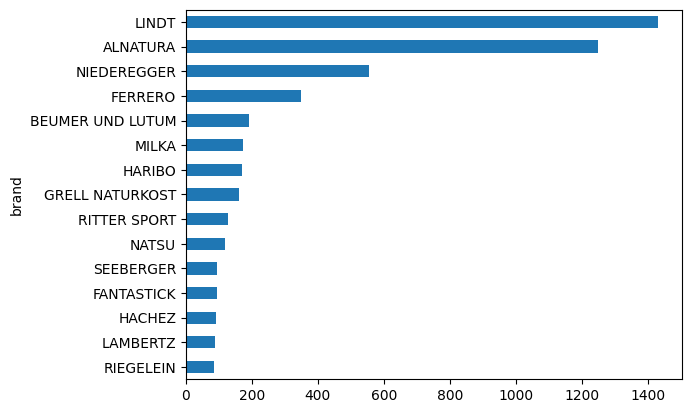

In [3]:
ax = products_df.brand.value_counts().head(15).plot(kind="barh")
ax.invert_yaxis()

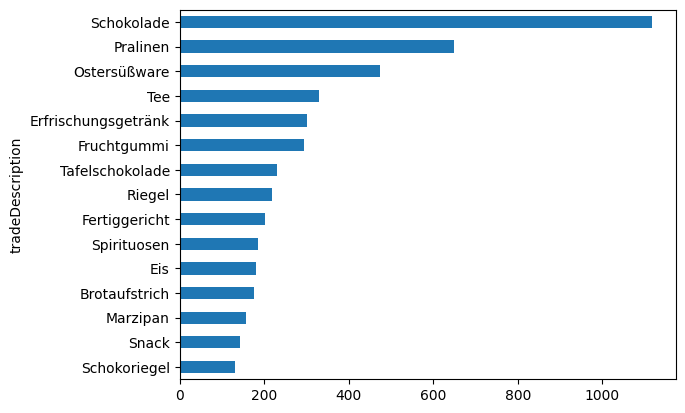

In [4]:
ax = products_df.tradeDescription.value_counts().head(15).plot(kind="barh")
ax.invert_yaxis()

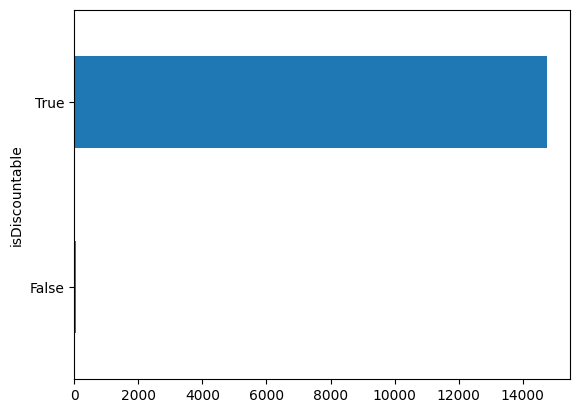

In [5]:
ax = products_df.isDiscountable.value_counts().head(15).plot(kind="barh")
ax.invert_yaxis()

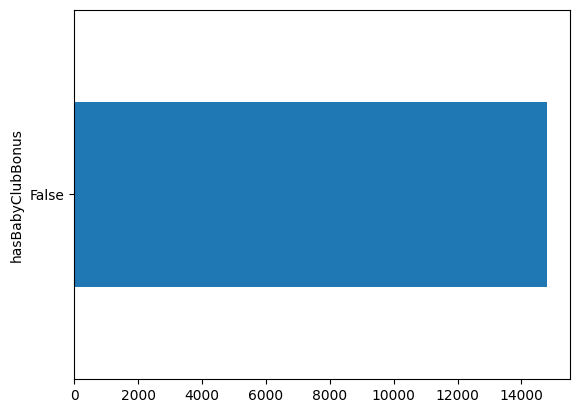

In [6]:
ax = products_df.hasBabyClubBonus.value_counts().head(15).plot(kind="barh")
ax.invert_yaxis()

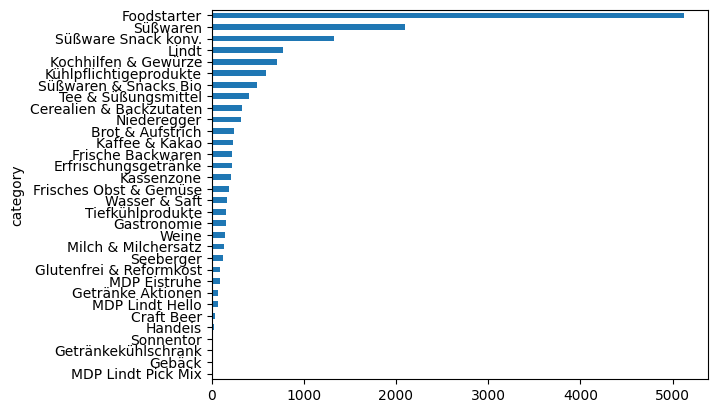

In [7]:
category_level2 = products_df.category.map(lambda x: x['level2'])
ax = category_level2.value_counts().plot(kind="barh")
ax.invert_yaxis()

## Show Product Images

  0%|          | 0/8 [00:00<?, ?it/s]

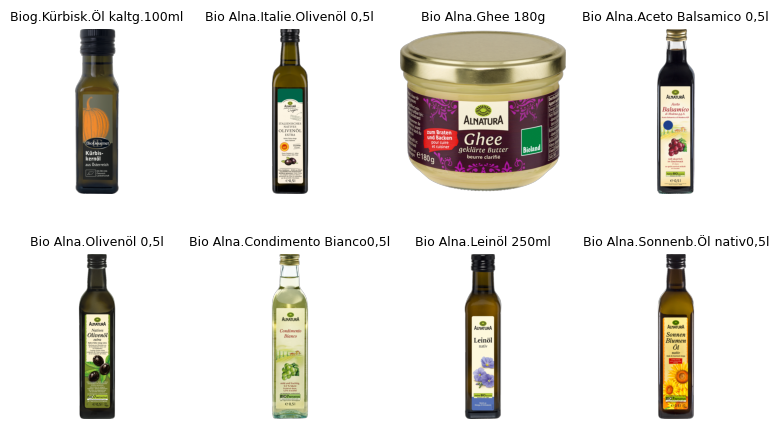

In [8]:
rows = 2; cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(8, 5))
axs = ax.flatten()

for i, prod in tqdm(list(products_df.head(rows * cols).iterrows())):
    
    # load image and paste png image (rgba) on white background
    url_im = Image.open(urllib.request.urlopen(prod.images[0]))
    im = Image.new("RGBA", url_im.size, "WHITE")
    im.paste(url_im)
    
    ax = axs[i]
    ax.imshow(im)
    ax.set_title(prod['name'], size=9)
    ax.axis('off')

fig.tight_layout(pad=2)